# Histogram of Control vs Experimental

In [16]:
import os
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import numpy as np

In [17]:
### all the determined variables
main_dir = "../GameObservers/"
sub_dir = "/DartBoard/"
result_dir = "../graphs/histogram/"
control = set(['ah', 'aj', 'dd', 'dl', 'ez', 'it', 'll', 'sh', 'sm', 'sr'])
exper = set(['bb', 'co', 'et', 'gn', 'gp', 'jz', 'ky', 'mb', 'mg', 'ni'])

In [18]:
def get_vals(obs_set, diff):
    result = []
    for obs in obs_set:
        path = main_dir + obs + sub_dir
        for data in os.listdir(path):
            if not data.endswith('.csv'):
                continue
            df = pd.read_csv(path + data)
            
            if diff == 0:
                result.extend(df["SA[seconds] dartboard hit"][(df["SA[seconds] dartboard hit"] > 50)])
            else:
                result.extend(df["SA[seconds] dartboard hit"][(df["SA[seconds] dartboard hit"] > 50)
                                                             & (df["Difficulty"] == diff)])
    return result

In [19]:
def make_histogram(diff, name):
    ## if name == "", then saves as histogram.pdf
    fs = 17 #fontsize

    control_vals =  get_vals(control, diff)
    exper_vals = get_vals(exper, diff)

    fig = plt.figure(figsize=(10,8))
    ax = plt.gca()

    plt.hist(control_vals, 100, alpha=0.5, label='Stereo normal', color='b')
    plt.hist(exper_vals, 100, alpha=0.5, label='Stereo-anomalous', color='r')
    plt.axvline(np.median(control_vals), color='b', linestyle='dashed', linewidth=2)
    plt.axvline(np.median(exper_vals), color='r', linestyle='dashed', linewidth=2)
    plt.legend(loc='upper right', prop={'size':18})

    ax.set_xlabel('Stereo Acuity (arc seconds)', labelpad=10, fontsize=fs)
    ax.set_ylabel('Frequency', labelpad=10, fontsize=fs)

    if name != "": 
        fig.savefig(result_dir + name, bbox_inches='tight', format='pdf', dpi=1000)
    else:
        plt.show()
    plt.close(fig)

In [20]:
def hist_with_diff(difficulties):
    for d in difficulties:
        make_histogram(d, "")

FileNotFoundError: [Errno 2] No such file or directory: '../graphs/histogram/histogram.pdf'

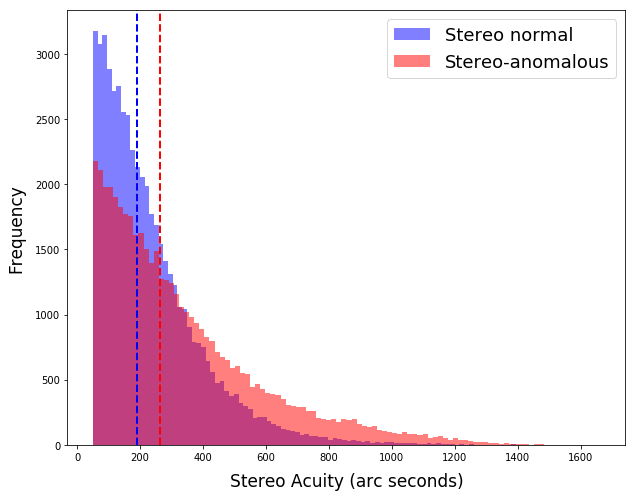

In [21]:
make_histogram(0, "histogram.pdf")

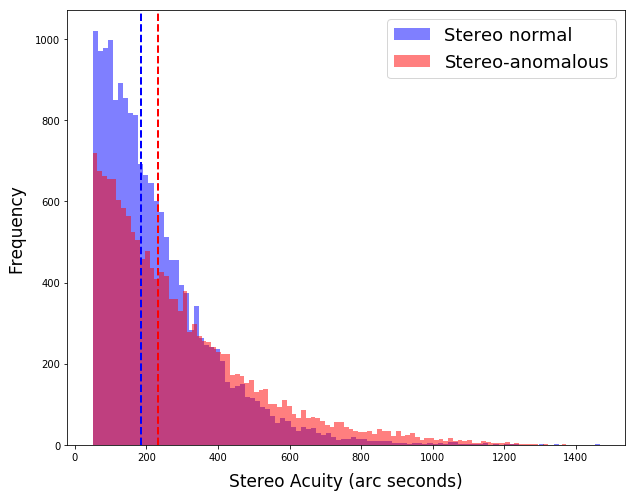

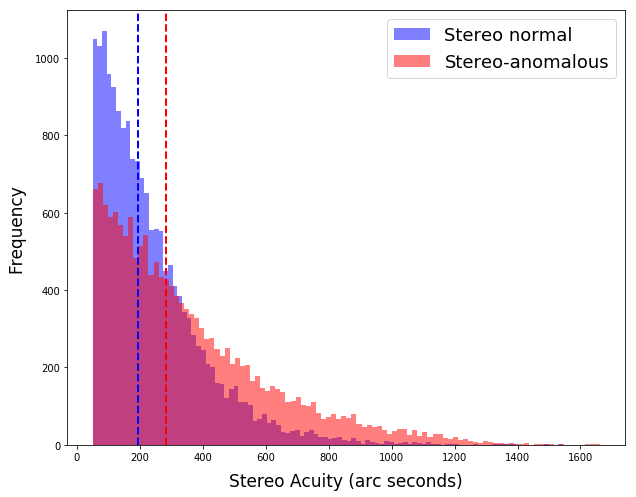

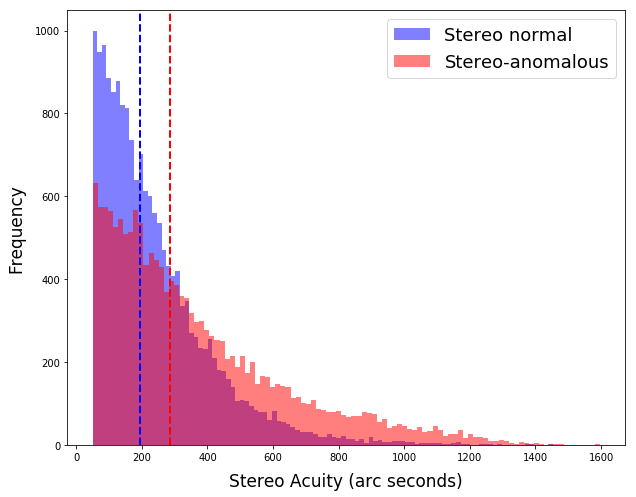

In [15]:
hist_with_diff([1, 2, 3])